# Pandas practice

Big 4 스포츠(NFL, MLB, NBA, NHL)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


# nhl_df = NHL(아이스하키) 경기 기록 데이터
# cities = 각 Metropolitan area 인구와 연고 스포츠 팀 데이터
nhl_df=pd.read_csv("assests/nhl.csv")
cities=pd.read_html("assests/wikipedia_data.html")[1]

In [2]:
cities.head()

,Metropolitan area,Country,Pop.rank,Population (2016 est.)[8],B4,NFL,MLB,NBA,NHL,B6,MLS,CFL
0,New York City,United States,1,20153634,9,GiantsJets[note 1],YankeesMets[note 2],KnicksNets,RangersIslandersDevils[note 3],11,Red BullsNew York City FC,—
1,Los Angeles,United States,2,13310447,8,RamsChargers[note 4],DodgersAngels,LakersClippers,KingsDucks,10,GalaxyLos Angeles FC[note 5],—
2,San Francisco Bay Area,United States,6,6657982,6,49ersRaiders[note 6],GiantsAthletics,Warriors,Sharks[note 7],7,Earthquakes,—
3,Chicago,United States,3,9512999,5,Bears[note 8],CubsWhite Sox,Bulls[note 9],Blackhawks,6,Fire,—
4,Dallas–Fort Worth,United States,4,7233323,4,Cowboys,Rangers,Mavericks,Stars,5,FC Dallas,—


In [3]:
# nhl_df 데이터프레임
nhl_df.head()

,team,GP,W,L,OL,PTS,PTS%,GF,GA,SRS,SOS,RPt%,ROW,year,League
0,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,2018,NHL
1,Tampa Bay Lightning*,82,54,23,5,113,.689,296,236,0.66,-0.07,.634,48,2018,NHL
2,Boston Bruins*,82,50,20,12,112,.683,270,214,0.62,-0.07,.610,47,2018,NHL
3,Toronto Maple Leafs*,82,49,26,7,105,.640,277,232,0.49,-0.06,.567,42,2018,NHL
4,Florida Panthers,82,44,30,8,96,.585,248,246,-0.01,-0.04,.537,41,2018,NHL


Columns 정리
```
"GP": Game played, "W": Wins, "L": Losses, "OL": Overtime losses, 
"PTS": Points (2 points for W, 1 point for OL, 0 point for L), "PTS%": "PTS / ("GP"*2),
"GF": Goals for, "GA": Goals against,
"SRS": Simple Rating System, "SOS": Strength of Schedule
"RPt%": ???
"ROW": "W" - Shootout wins
"year": year
```

In [4]:
# 2018년 데이터
nhl_df=nhl_df[nhl_df['year']==2018]

# 팀명에서 지역명 추출
area = nhl_df['team'].str.split().str[:-1].str.join(" ")
nhl_df['Area']=area

# 각 리그를 구분하는 row 삭제(자르고 다시 합치기)
atlantic = nhl_df.iloc[1:9]
metropolitan = nhl_df.iloc[10:18]
central = nhl_df.iloc[19:26]
pacific = nhl_df.iloc[27:35]
total = [atlantic, metropolitan, central, pacific]
nhl_df = pd.concat(total)

# rearanging
nhl_df.index = np.arange(1,len(nhl_df)+1)

# 'Area'에 지역명이 정확하게 표현되지 않은 부분들 수정
nhl_df['Area'].replace({'Toronto Maple': 'Toronto',
                        'Detroit Red': 'Detroit',
                        'Columbus Blue': 'Columbus',
                        'New Jersey': 'New York',
                        'Vegas Golden': 'Las Vegas',
                        'San Jose': 'San Francisco',
                        'Anaheim': 'Los Angeles'}, inplace=True)

# 승률 column 생성 및 지역별 승률 표현
nhl_df['win/loss ratio']=nhl_df['W'].astype(float)/(nhl_df['W'].astype(float)+nhl_df['L'].astype(float))
nhl_df = nhl_df[['Area', 'win/loss ratio']]
wpt = nhl_df.groupby('Area').mean()
wpt

,win/loss ratio
Area,
Arizona,0.414286
Boston,0.714286
Buffalo,0.357143
Calgary,0.513889
Carolina,0.507042
Chicago,0.458333
Colorado,0.589041
Columbus,0.600000
Dallas,0.567568


In [5]:
# cities 데이터프레임
cities.head()

,Metropolitan area,Country,Pop.rank,Population (2016 est.)[8],B4,NFL,MLB,NBA,NHL,B6,MLS,CFL
0,New York City,United States,1,20153634,9,GiantsJets[note 1],YankeesMets[note 2],KnicksNets,RangersIslandersDevils[note 3],11,Red BullsNew York City FC,—
1,Los Angeles,United States,2,13310447,8,RamsChargers[note 4],DodgersAngels,LakersClippers,KingsDucks,10,GalaxyLos Angeles FC[note 5],—
2,San Francisco Bay Area,United States,6,6657982,6,49ersRaiders[note 6],GiantsAthletics,Warriors,Sharks[note 7],7,Earthquakes,—
3,Chicago,United States,3,9512999,5,Bears[note 8],CubsWhite Sox,Bulls[note 9],Blackhawks,6,Fire,—
4,Dallas–Fort Worth,United States,4,7233323,4,Cowboys,Rangers,Mavericks,Stars,5,FC Dallas,—


In [6]:
#필요한 부분만
cities=cities.iloc[:-1,[0,3,5,6,7,8]]
cities.head()

,Metropolitan area,Population (2016 est.)[8],NFL,MLB,NBA,NHL
0,New York City,20153634,GiantsJets[note 1],YankeesMets[note 2],KnicksNets,RangersIslandersDevils[note 3]
1,Los Angeles,13310447,RamsChargers[note 4],DodgersAngels,LakersClippers,KingsDucks
2,San Francisco Bay Area,6657982,49ersRaiders[note 6],GiantsAthletics,Warriors,Sharks[note 7]
3,Chicago,9512999,Bears[note 8],CubsWhite Sox,Bulls[note 9],Blackhawks
4,Dallas–Fort Worth,7233323,Cowboys,Rangers,Mavericks,Stars


In [7]:
# nhl_df 데이터프레임과 merge하기 위해 'Area' column 생성
cities['Area']=cities['Metropolitan area']

# nhl_df['Area']와 차이나는 부분 수정 (하나하나 수정...)
cities['Area'].replace({'New York City': 'New York', 
                        'San Francisco Bay Area': 'San Francisco', 
                        'Dallas–Fort Worth': 'Dallas', 
                        'Washington, D.C.': 'Washington', 
                        'Minneapolis–Saint Paul': 'Minnesota',
                        'Miami–Fort Lauderdale': 'Florida',
                        'Tampa Bay Area': 'Tampa Bay',
                        'Raleigh': 'Carolina',
                        'Denver': 'Colorado',
                        'Phoenix': 'Arizona'}, inplace=True)

# 복잡한 column명 수정 및 정리
cities=cities.rename(columns={'Population (2016 est.)[8]': 'Population'})
nhl_cities=cities[['Metropolitan area','Population','Area']]
nhl_cities['Population']=nhl_cities['Population'].astype(int)
nhl_cities = nhl_cities.set_index(['Metropolitan area'])

<ipython-input-7-1b9a619be44b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_cities['Population']=nhl_cities['Population'].astype(int)


In [8]:
# nhl_df와 nhl_cities 데이터프레임 merge 
NHL = pd.merge(nhl_cities, wpt, left_on='Area', right_index=True)
NHL

,Population,Area,win/loss ratio
Metropolitan area,,,
New York City,20153634,New York,0.518201
Los Angeles,13310447,Los Angeles,0.622895
San Francisco Bay Area,6657982,San Francisco,0.625000
Chicago,9512999,Chicago,0.458333
Dallas–Fort Worth,7233323,Dallas,0.567568
"Washington, D.C.",6131977,Washington,0.653333
Philadelphia,6070500,Philadelphia,0.617647
Boston,4794447,Boston,0.714286
Minneapolis–Saint Paul,3551036,Minnesota,0.633803


In [9]:
# NBA(농구) 데이터도 똑같이 반복

nba_df=pd.read_csv("assests/nba.csv")
cities=pd.read_html("assests/wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]
nba_df

,team,W,L,W/L%,GB,PS/G,PA/G,SRS,year,League
0,Toronto Raptors* (1),59,23,0.72,—,111.7,103.9,7.29,2018,NBA
1,Boston Celtics* (2),55,27,0.6709999999999999,4.0,104.0,100.4,3.23,2018,NBA
2,Philadelphia 76ers* (3),52,30,0.634,7.0,109.8,105.3,4.3,2018,NBA
3,Cleveland Cavaliers* (4),50,32,0.61,9.0,110.9,109.9,0.59,2018,NBA
4,Indiana Pacers* (5),48,34,0.585,11.0,105.6,104.2,1.18,2018,NBA
...,...,...,...,...,...,...,...,...,...,...
157,San Antonio Spurs* (1),62,20,.756,—,105.4,97.6,8.00,2014,NBA
158,Houston Rockets* (4),54,28,.659,8.0,107.7,103.1,5.06,2014,NBA
159,Memphis Grizzlies* (7),50,32,.610,12.0,96.1,94.6,2.18,2014,NBA
160,Dallas Mavericks* (8),49,33,.598,13.0,104.8,102.4,2.91,2014,NBA


In [10]:
nba_df=nba_df[nba_df['year']==2018]
area = nba_df['team'].str.split().str[:-2].str.join(" ")
nba_df['Area']=area
nba_df['Area'].replace({'Golden State': 'San Francisco',
                        'Portland Trail': 'Portland',
                        'Columbus Blue': 'Columbus',
                        'Vegas Golden': 'Las Vegas',
                        'San Jose': 'San Francisco',
                        'Anaheim': 'Los Angeles',
                        'Brooklyn': 'New York'}, inplace=True)

# nba_df에 win/loss ratio가 계산되어 있음
nba_df['win/loss ratio']=nba_df['W/L%'].astype(float)
nba_df = nba_df[['Area', 'win/loss ratio']]
nba_wpt = nba_df.groupby('Area').mean()

<ipython-input-10-0c0f10202bcc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df['Area']=area
C:\Users\pcw78\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-10-0c0f10202bcc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n

In [11]:
cities['Area']=cities['Metropolitan area']
cities['Area'].replace({'New York City': 'New York', 
                        'San Francisco Bay Area': 'San Francisco', 
                        'Dallas–Fort Worth': 'Dallas', 
                        'Washington, D.C.': 'Washington', 
                        'Minneapolis–Saint Paul': 'Minnesota',
                        'Miami–Fort Lauderdale': 'Miami',
                        'Salt Lake City': 'Utah',
                        'Indianapolis': 'Indiana'}, inplace=True)
cities=cities.rename(columns={'Population (2016 est.)[8]': 'Population'})
nba_cities=cities[['Metropolitan area','Population','Area']]
nba_cities['Population']=nba_cities['Population'].astype(int)
nba_cities = nba_cities.set_index(['Metropolitan area'])

<ipython-input-11-864d60f3c0ae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_cities['Population']=nba_cities['Population'].astype(int)


In [12]:
NBA = pd.merge(nba_cities, nba_wpt, left_on='Area', right_index=True)

In [13]:
NBA

,Population,Area,win/loss ratio
Metropolitan area,,,
New York City,20153634,New York,0.3475
Los Angeles,13310447,Los Angeles,0.4695
San Francisco Bay Area,6657982,San Francisco,0.7070
Chicago,9512999,Chicago,0.3290
Dallas–Fort Worth,7233323,Dallas,0.2930
"Washington, D.C.",6131977,Washington,0.5240
Philadelphia,6070500,Philadelphia,0.6340
Boston,4794447,Boston,0.6710
Minneapolis–Saint Paul,3551036,Minnesota,0.5730


# Plotting

In [14]:
sports = pd.merge(NHL, NBA, on='Area')

In [15]:
sports = sports.set_index('Area')

In [16]:
sports.drop('Population_y', axis=1, inplace=True)

In [17]:
sports.rename(columns={'Population_x': 'Population', 'win/loss ratio_x': 'wl_ratio_nhl', 'win/loss ratio_y': 'wl_ratio_nba'}, inplace=True)

In [18]:
sports

,Population,wl_ratio_nhl,wl_ratio_nba
Area,,,
New York,20153634,0.518201,0.3475
Los Angeles,13310447,0.622895,0.4695
San Francisco,6657982,0.625000,0.7070
Chicago,9512999,0.458333,0.3290
Dallas,7233323,0.567568,0.2930
Washington,6131977,0.653333,0.5240
Philadelphia,6070500,0.617647,0.6340
Boston,4794447,0.714286,0.6710
Minnesota,3551036,0.633803,0.5730


<AxesSubplot:xlabel='Area'>

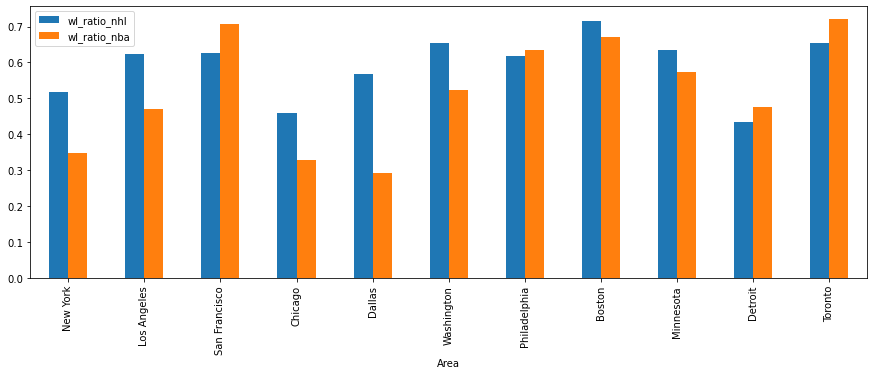

In [19]:
sports[['wl_ratio_nhl','wl_ratio_nba']].plot(kind='bar', figsize=(15,5))

Text(0, 0.5, 'NBA W/L ratio')

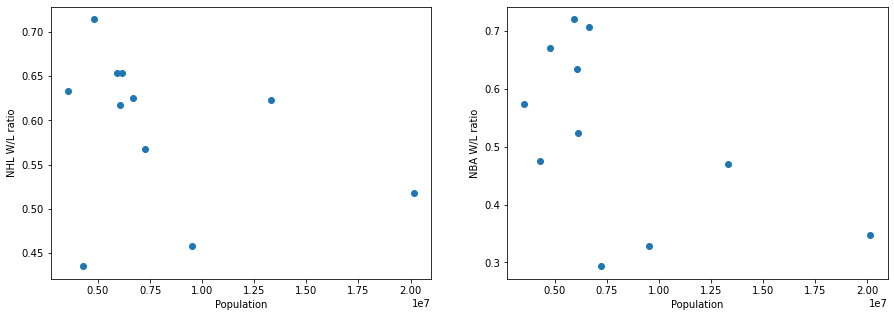

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(sports.Population, sports.wl_ratio_nhl)
plt.xlabel("Population")
plt.ylabel("NHL W/L ratio")
plt.subplot(1,2,2)
plt.scatter(sports.Population, sports.wl_ratio_nba)
plt.xlabel("Population")
plt.ylabel("NBA W/L ratio")

In [21]:
sports[['Population','wl_ratio_nhl']].corr()

,Population,wl_ratio_nhl
Population,1.000000,-0.295691
wl_ratio_nhl,-0.295691,1.000000


In [22]:
sports[['Population','wl_ratio_nba']].corr()

,Population,wl_ratio_nba
Population,1.000000,-0.526796
wl_ratio_nba,-0.526796,1.000000


In [23]:
nhl_ratio = sports['wl_ratio_nhl']
nba_ratio = sports['wl_ratio_nba']

In [24]:
stats.ttest_rel(nhl_ratio,nba_ratio )

Ttest_relResult(statistic=2.0096605651592827, pvalue=0.07221555773579061)

# Additional

In [25]:
import seaborn as sns

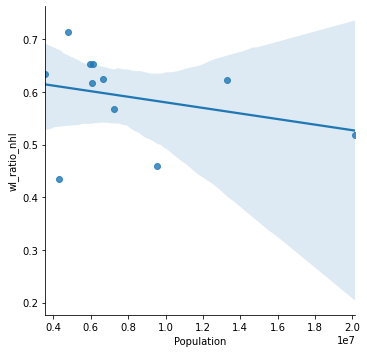

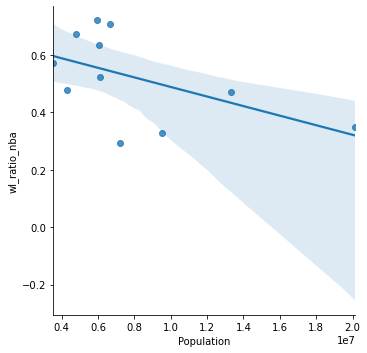

In [36]:
sns.lmplot(x='Population', y='wl_ratio_nhl',  data=sports)
sns.lmplot(x='Population', y='wl_ratio_nba',  data=sports)

In [37]:
import statsmodels.formula.api as smf

In [38]:
reg1 = smf.ols(formula = 'wl_ratio_nhl ~ Population', data=sports).fit()
reg1.summary()

C:\Users\pcw78\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           wl_ratio_nhl   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.8623
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.377
Time:                        01:48:56   Log-Likelihood:                 12.290
No. Observations:                  11   AIC:                            -20.58
Df Residuals:                       9   BIC:                            -19.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6330      0.053     12.054      0.000       0.514       0.752
Population -5.292e-09    5.7e-09     -0.929      0.377   -1.82e-08     7.6e-09
==============================================================================
Omnibus:                        4.137   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                1.933
Skew:                          -1.025   Prob(JB):                        0.380
Kurtosis:                       3.115   Cond. No.                     1.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
reg2 = smf.ols(formula = 'wl_ratio_nba ~ Population', data=sports).fit()
reg2.summary()

C:\Users\pcw78\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           wl_ratio_nba   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.457
Date:                Thu, 10 Jun 2021   Prob (F-statistic):             0.0959
Time:                        01:49:22   Log-Likelihood:                 7.3144
No. Observations:                  11   AIC:                            -10.63
Df Residuals:                       9   BIC:                            -9.833
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6549      0.083      7.933      0.000       0.468       0.842
Population -1.666e-08   8.96e-09     -1.859      0.096   -3.69e-08    3.61e-09
==============================================================================
Omnibus:                        0.758   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.669
Skew:                          -0.464   Prob(JB):                        0.716
Kurtosis:                       2.225   Cond. No.                     1.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""